In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy

from sklearn.manifold import SpectralEmbedding

In [2]:
### Map representative ID to representative names

df = pd.read_csv('vote_data_118/h1.csv')
df.drop(0, inplace = True)
df.reset_index(drop = True, inplace = True)
df['name'] = df['name'].str.removeprefix('Rep. ').str.replace(r' \[.*\]', '', regex = True)
colors = np.asarray(df['party'])
colors[colors == 'Republican'] = 'red'
colors[colors == 'Democrat'] = 'blue'
colors[(colors != 'red') & (colors != 'blue')] = 'gray'

In [3]:
adj_list = [[0 for i in range(435)] for j in range(435)]
for file in os.listdir('vote_data_118'):
    df = pd.read_csv('vote_data_118/' + file)
    df.drop(df.index[df['id'] == 'person'], inplace = True)
    df.reset_index(drop = True, inplace = True)

    y = df.index[df['vote'] == 'Yea'].tolist()
    n = df.index[df['vote'] == 'Nay'].tolist()

    for i in y:
        for j in y:
            if i == j:
                continue
            else:
                adj_list[i][j] += 1

    for i in n:
        for j in n:
            if i == j:
                continue
            else:
                adj_list[i][j] += 1

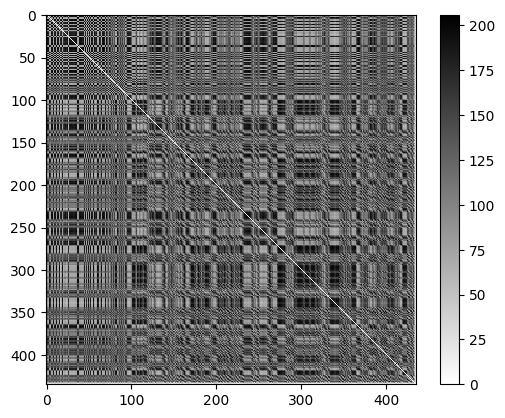

In [4]:
sparse_adj_list = scipy.sparse.csr_matrix(adj_list).todense()
plt.imshow(sparse_adj_list,interpolation='none',cmap='binary')
plt.colorbar()

Text(0.5, 1.0, '118th Congress - House of Representatives Voting Patterns')

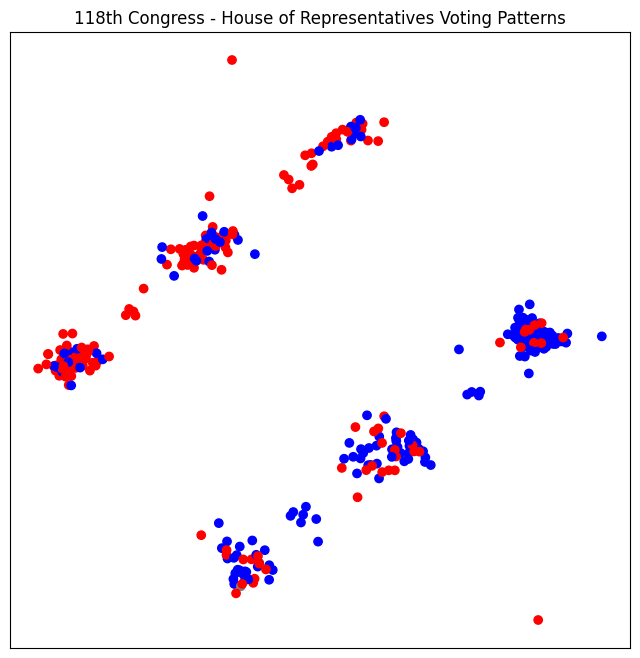

In [5]:
rep_embedding = SpectralEmbedding(affinity = 'precomputed').fit_transform(pd.DataFrame(adj_list))
plt.figure(figsize=(8, 8))
plt.scatter(rep_embedding[:, 0], rep_embedding[:, 1], c = colors)
#plt.scatter(rep_embedding[:, 0], rep_embedding[:, 1])
plt.xticks([])
plt.yticks([])
plt.title('118th Congress - House of Representatives Voting Patterns')

In [7]:
np.savetxt('118embedding.csv', rep_embedding, delimiter=',')

In [10]:
np.savetxt('118colors.csv', colors, delimiter=',', fmt='%s')

In [6]:
rep_embedding

array([[-2.68096305e-04, -3.44319753e-05],
       [ 2.57459110e-04,  2.77192889e-05],
       [ 3.10848761e-04,  2.20691925e-05],
       [-2.68733530e-04, -3.76676450e-05],
       [-2.55808809e-04, -1.74192387e-05],
       [-2.57291784e-04,  3.05178655e-05],
       [ 2.74770369e-04,  3.89875188e-05],
       [ 2.88517074e-04,  2.70041951e-05],
       [-2.56473285e-04, -1.70388190e-05],
       [ 2.96661270e-04,  5.02835438e-06],
       [ 3.00998206e-04,  3.24757473e-05],
       [ 2.75355786e-04,  1.70261873e-05],
       [-2.58541516e-04, -1.41243531e-05],
       [ 2.95665188e-04,  2.48526472e-05],
       [ 2.94955430e-04,  3.35101907e-05],
       [-2.54679259e-04, -6.04927545e-06],
       [-2.64523203e-04, -2.40907573e-05],
       [ 3.61692893e-04,  2.51823169e-05],
       [ 2.82105478e-04,  1.44794171e-05],
       [-2.51891472e-04, -8.37201057e-06],
       [ 2.93967246e-04,  1.58044188e-06],
       [ 2.65455205e-04,  5.43741117e-05],
       [ 2.84812319e-04,  3.91439035e-05],
       [ 2.